In [35]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from const import METHODS


In [2]:
base_path = "./parsed/"

In [3]:
def combine_data():
    data = pd.DataFrame()
    for method in METHODS:
        if METHODS[method]["path"]:
            df = pd.read_csv(base_path + method + ".csv")
            data = pd.concat([data, df])
    return data
    

In [4]:
combined_data = combine_data()

In [68]:
def plot_time(df: pd.DataFrame):
    sns.boxplot(x="method", y="time", data=df)

    plt.title("Time measurements by Method")
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.ylabel("Time [s]")
    custom_labels = list(map(lambda x: x["tick"] if x["path"] else None, METHODS.values()))
    custom_labels = list(filter(lambda x: x is not None, custom_labels))
    plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
    plt.grid(True, alpha=0.25)

    plt.show()

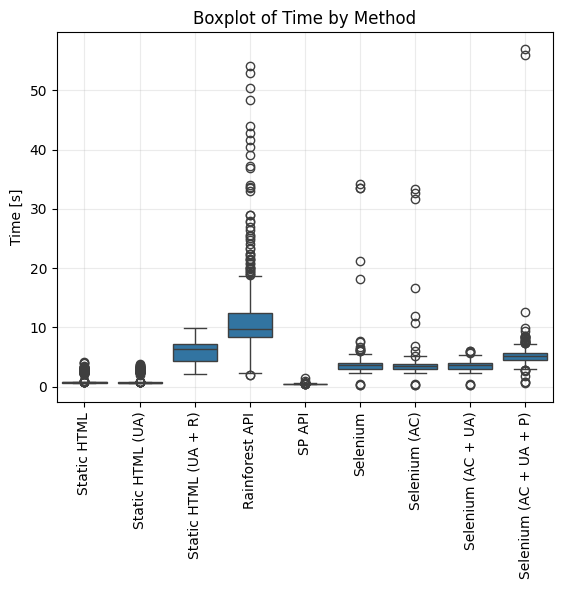

In [69]:
keys = list(METHODS.keys())

plot_time(combined_data)

In [70]:
def category_boxplots(df: pd.DataFrame):
    methods = df["method"].unique()

    categories_ticks = {
        "home_and_kitchen": "H&K",
        "beauty_and_personal_care": "B&PC",
        "clothing_shoes_jewelry": "CSJ",
        "toys_and_games": "T&G",
        "health_and_household": "H&H",
    }

    max_plots_per_row = 3
    num_methods = len(methods)
    num_rows = math.ceil(num_methods / max_plots_per_row)

    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(15, 5 * num_rows), sharey=True)
    axes = axes.flatten()

    for i, method in enumerate(methods):
        method_data = df[df["method"] == method]
        boxplot_data = [method_data[method_data["category"] == cat]["time"] for cat in method_data["category"].unique()]
        axes[i].boxplot(boxplot_data, labels=list(map(lambda x: categories_ticks[x], method_data["category"].unique())))
        axes[i].set_title(METHODS[method]["tick"])
        if i % max_plots_per_row == 0:
            axes[i].set_ylabel("Time [s]")

    for j in range(len(methods), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Time measurements by category", fontsize=16, y=0.95)  # Adjust y for padding
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.subplots_adjust(hspace=0.5, top=0.88)
plt.show()


/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_59038/252002009.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(boxplot_data, labels=list(map(lambda x: categories_ticks[x], method_data["category"].unique())))
/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_59038/252002009.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(boxplot_data, labels=list(map(lambda x: categories_ticks[x], method_data["category"].unique())))
/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_59038/252002009.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot

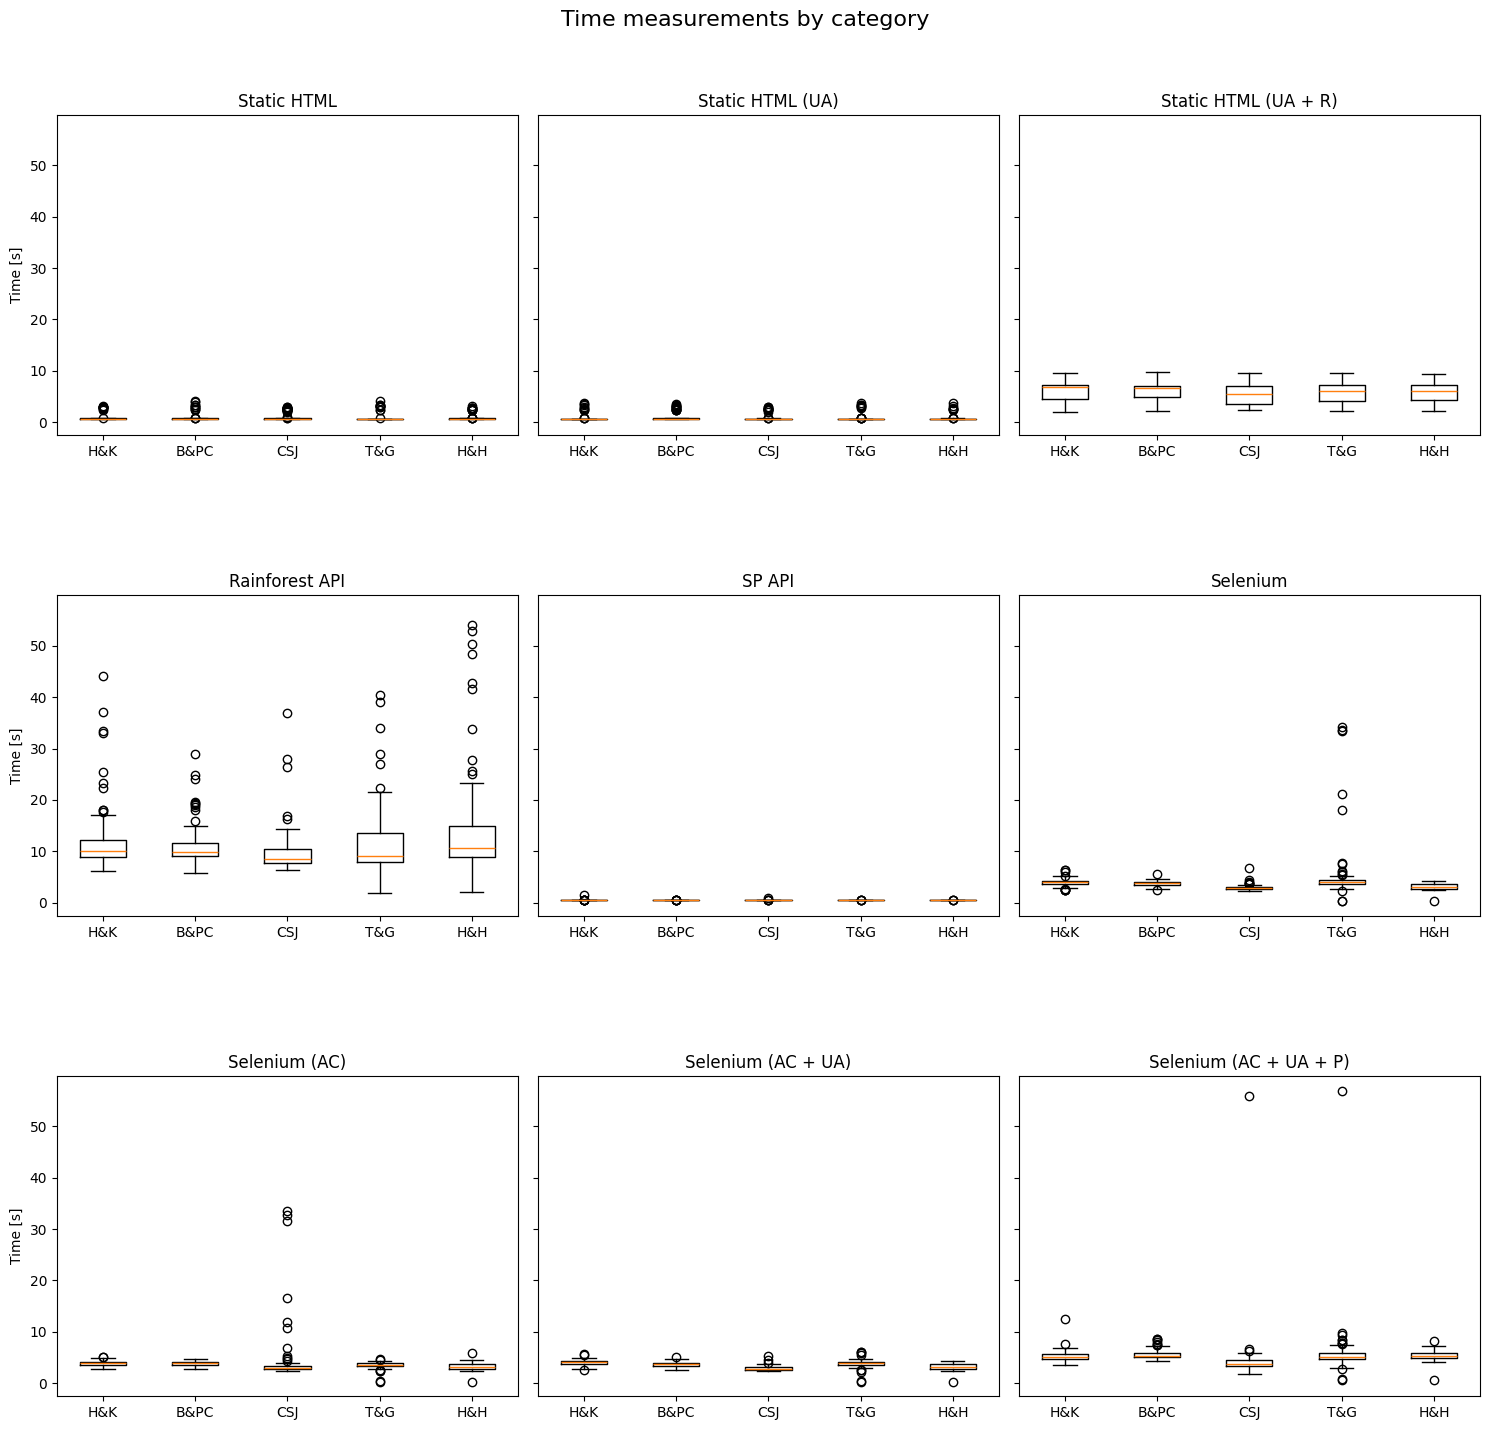

In [71]:
category_boxplots(combined_data)

In [27]:
def get_time_stats(df: pd.DataFrame):
    return df.groupby("method")["time"].describe()

In [28]:
get_time_stats(combined_data)

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
RAINFOREST,500.0,11.780953,6.737972,1.971693,8.312920,9.694187,12.490914,54.025893
SELENIUM_BARE,500.0,3.829008,2.658379,0.293942,3.007728,3.651189,4.074714,34.251094
SELENIUM_CAPTCHA,500.0,3.731143,2.453857,0.299084,3.058013,3.556438,3.903516,33.421847
SELENIUM_CAPTCHA_ROTATE_USER_AGENT,500.0,3.538556,0.702161,0.291105,3.026721,3.576499,4.018734,6.047225
SELENIUM_CAPTCHA_ROTATE_USER_AGENT_PROXY,500.0,5.304545,3.443362,0.706059,4.570532,5.103503,5.669639,56.958546
SPAPI,500.0,0.524903,0.049984,0.479602,0.515706,0.520417,0.527049,1.520363
STATIC_BARE,500.0,0.961805,0.693737,0.689894,0.699732,0.709479,0.732222,4.197180
STATIC_ROTATE_USER_AGENT,500.0,0.908188,0.635757,0.689435,0.697846,0.704553,0.717444,3.757803
STATIC_ROTATE_USER_AGENT_RETRIES,500.0,5.863665,1.904890,2.072648,4.260101,6.356403,7.160932,9.823450
